# Understanding Trends in Violent Crime Rates Using Machine Learning: A Mini Project


**Module Name: Topics in Business Analytics**

**Module Code: BEMM457**

**Student Name: Rishita Chakraborty**

**Student ID: 740077472**

**Date: December 16, 2024**

### Data Loading and Initial Exploration
This section focuses on loading the dataset into a Pandas DataFrame and conducting an initial exploration to understand its structure, data types, and basic statistical properties.

In [32]:
import pandas as pd

# File path to your CSV file
file_path_csv = "Documents/violent-crime-rate-california-2000-2013.csv"

# Loading the CSV file and specifying the data type for the first column
violent_crime_csv_data = pd.read_csv(file_path_csv, dtype={0: str})


# Display the first few rows of the dataset
print(violent_crime_csv_data.head())

# Check for columns and data types
print(violent_crime_csv_data.info())

# Summary statistics to understand numerical data
print(violent_crime_csv_data.describe())




  ind_id                                 ind_definition  reportyear  \
0    752  Number of Violent Crimes per 1,000 Population      2000.0   
1    752  Number of Violent Crimes per 1,000 Population      2000.0   
2    752  Number of Violent Crimes per 1,000 Population      2000.0   
3    752  Number of Violent Crimes per 1,000 Population      2000.0   
4    752  Number of Violent Crimes per 1,000 Population      2000.0   

   race_eth_code race_eth_name geotype  geotypevalue     geoname  county_fips  \
0            9.0         Total      CA           6.0  California          NaN   
1            9.0         Total      CA           6.0  California          NaN   
2            9.0         Total      CA           6.0  California          NaN   
3            9.0         Total      CA           6.0  California          NaN   
4            9.0         Total      CA           6.0  California          NaN   

  county_name  ...  denominator      rate   ll_95ci   ul_95ci        se  \
0         N

In [11]:
print(violent_crime_csv_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49227 entries, 0 to 49226
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  49227 non-null  object 
 1   ind_definition          49226 non-null  object 
 2   reportyear              49226 non-null  float64
 3   race_eth_code           49226 non-null  float64
 4   race_eth_name           49226 non-null  object 
 5   geotype                 49226 non-null  object 
 6   geotypevalue            49226 non-null  float64
 7   geoname                 49226 non-null  object 
 8   county_fips             48176 non-null  float64
 9   county_name             48176 non-null  object 
 10  region_code             49156 non-null  float64
 11  region_name             49156 non-null  object 
 12  strata_name_code        49226 non-null  float64
 13  strata_name             49226 non-null  object 
 14  strata_level_name_code  49226 non-null

In [12]:
print(violent_crime_csv_data.describe())


         reportyear  race_eth_code  geotypevalue   county_fips   region_code  \
count  49226.000000        49226.0  49226.000000  48176.000000  49156.000000   
mean    2006.677711            9.0  39054.299923   6056.460561      8.396778   
std        4.070900            0.0  26562.720267     29.845061      4.951046   
min     2000.000000            9.0      1.000000   6001.000000      1.000000   
25%     2003.000000            9.0  13588.000000   6037.000000      4.000000   
50%     2007.000000            9.0  39304.000000   6059.000000     10.000000   
75%     2010.000000            9.0  60242.000000   6081.000000     14.000000   
max     2013.000000            9.0  87090.000000   6115.000000     14.000000   

       strata_name_code  strata_level_name_code      numerator   denominator  \
count           49226.0            49226.000000   32293.000000  3.709000e+04   
mean                1.0                3.619551     618.156133  2.617145e+05   
std                 0.0                

# Step 1: Clean the Data

In [14]:
# Filter out rows with missing crime rate
cleaned_data = violent_crime_csv_data.dropna(subset=['rate']).copy()  # Using .copy() to avoid the warning

# Ensure 'reportyear' is treated as an integer
cleaned_data['reportyear'] = cleaned_data['reportyear'].astype(int)  # Directly setting the column

# Display cleaned data
print(cleaned_data[['reportyear', 'rate']].head())


    reportyear      rate
4         2000  6.217499
9         2000  6.582206
14        2000  8.278146
19        2000  5.246190
24        2000  3.440452


# Step 2: Trend Analysis (Plot Crime Rates Over Time)

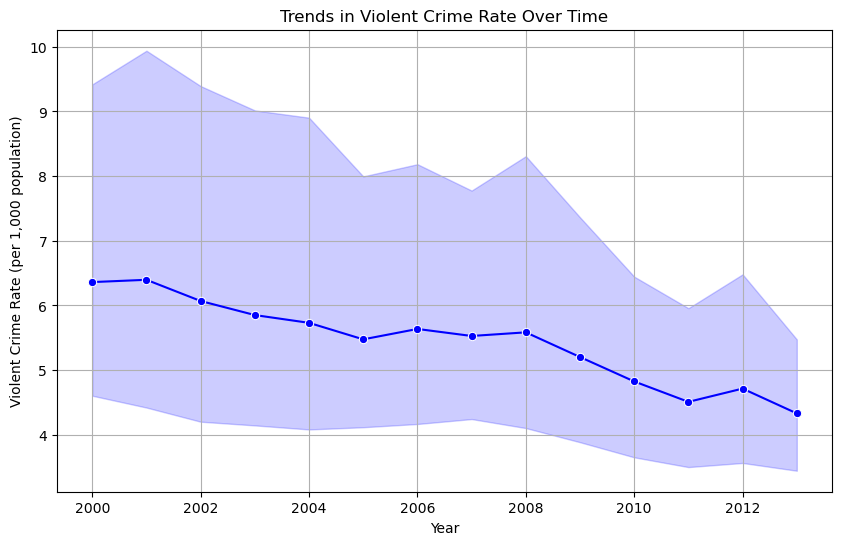

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the crime rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='reportyear', y='rate', marker='o', color='b')
plt.title('Trends in Violent Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate (per 1,000 population)')
plt.grid(True)
plt.show()


### Findings:
The line plot shows a steady decline in violent crime rates from 2000 to 2013, with fluctuations in the rate of decline.
The shaded region represents confidence intervals or variability in the data, which decreases over time, indicating more consistent crime rate trends in later years.
The overall downward trend suggests improvements in factors like law enforcement, socioeconomic conditions, or other crime-reduction policies over the years.

# Step 3: Year-to-Year Percentage Change

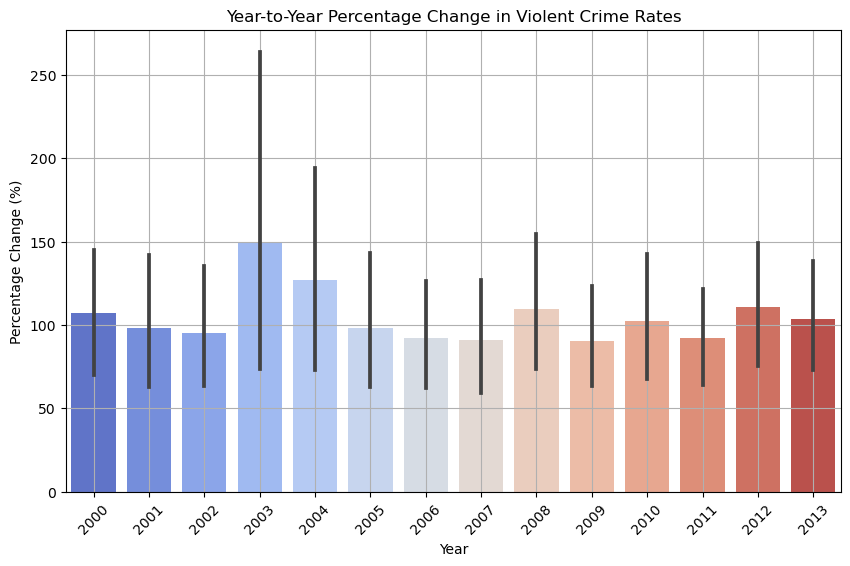

In [16]:
# Calculate percentage change in crime rate from year to year
cleaned_data['PctChange'] = cleaned_data['rate'].pct_change() * 100

# Plot the percentage change
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x='reportyear', y='PctChange', palette='coolwarm')
plt.title('Year-to-Year Percentage Change in Violent Crime Rates')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Findings:
The bars represent year-over-year percentage changes in violent crime rates, with variations in height indicating differences in the magnitude of these changes.
The trend is inconsistent, with some years (e.g., 2003) showing significantly higher percentage changes compared to others.
The error bars (black lines) indicate variability or uncertainty, which is notably high in some years, such as 2003 and 2004.
This suggests that crime rates had fluctuating dynamics over time, with certain periods showing volatility in their percentage changes.

# Step 4: Explore Anomalies

In [17]:
# Sort data by crime rate to find the highest and lowest crime years
print(cleaned_data.sort_values(by='rate', ascending=False).head())


      ind_id                                 ind_definition  reportyear  \
6505     752  Number of Violent Crimes per 1,000 Population        2001   
9896     752  Number of Violent Crimes per 1,000 Population        2002   
13287    752  Number of Violent Crimes per 1,000 Population        2003   
16678    752  Number of Violent Crimes per 1,000 Population        2004   
3114     752  Number of Violent Crimes per 1,000 Population        2000   

       race_eth_code race_eth_name geotype  geotypevalue      geoname  \
6505             9.0         Total      PL       82422.0  Vernon city   
9896             9.0         Total      PL       82422.0  Vernon city   
13287            9.0         Total      PL       82422.0  Vernon city   
16678            9.0         Total      PL       82422.0  Vernon city   
3114             9.0         Total      PL       82422.0  Vernon city   

       county_fips  county_name  ...        rate     ll_95ci     ul_95ci  \
6505        6037.0  Los Angeles  .

# Step 5: Correlation Analysis

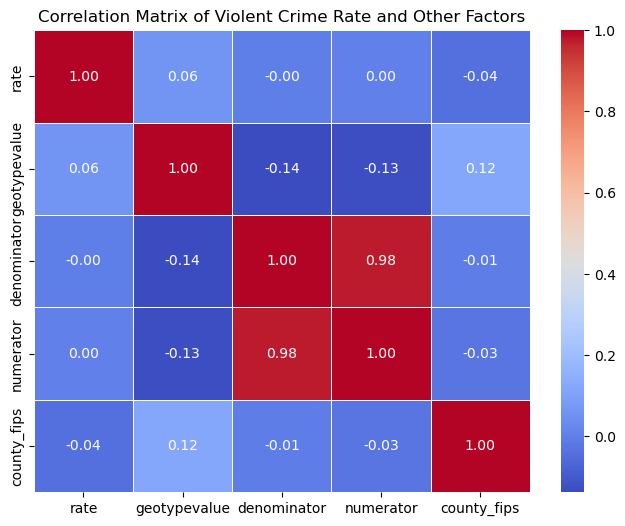

In [18]:
# Select relevant numerical columns for correlation analysis
correlation_data = cleaned_data[['rate', 'geotypevalue', 'denominator', 'numerator', 'county_fips']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Violent Crime Rate and Other Factors')
plt.show()


The strongest correlation is between numerator and denominator (0.98), indicating a nearly perfect linear relationship. This is likely due to the formula used to calculate the crime rate (rate = numerator/denominator).
The rate (violent crime rate) shows minimal correlation with other variables, suggesting that it may not directly depend on these specific factors (geotypevalue, county_fips).
There is weak correlation between rate and geotypevalue (0.06), which suggests some minor link, though not significant.

# Step 6: Correlation with Geographic and Demographic Data


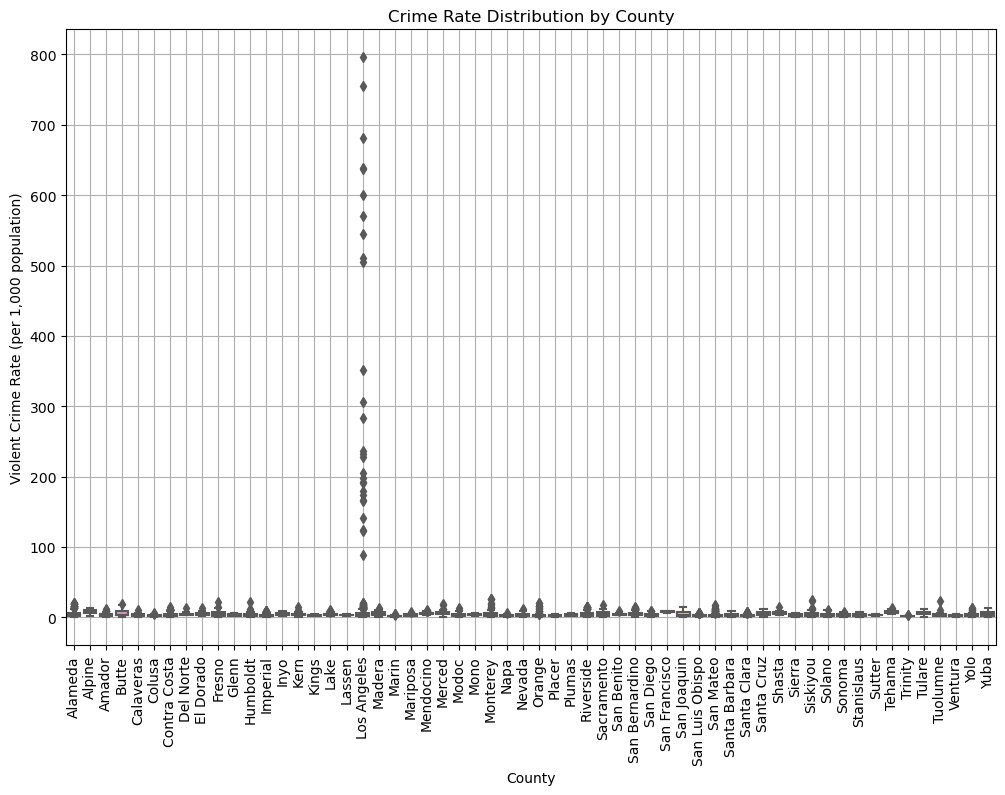

In [19]:
#Visualizing Crime Rate by County
# Boxplot to visualize crime rates by county
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data, x='county_name', y='rate', palette='Set2')
plt.xticks(rotation=90)
plt.title('Crime Rate Distribution by County')
plt.xlabel('County')
plt.ylabel('Violent Crime Rate (per 1,000 population)')
plt.grid(True)
plt.show()


There is a huge variation in violent crime rates between counties.
Los Angeles County (or similar regions with tall spikes) appears to have significantly higher rates compared to most other counties.
Many counties show very low crime rates, as most data points are clustered near the bottom of the chart.
Extreme outliers are present, potentially affecting the overall analysis of crime distribution.

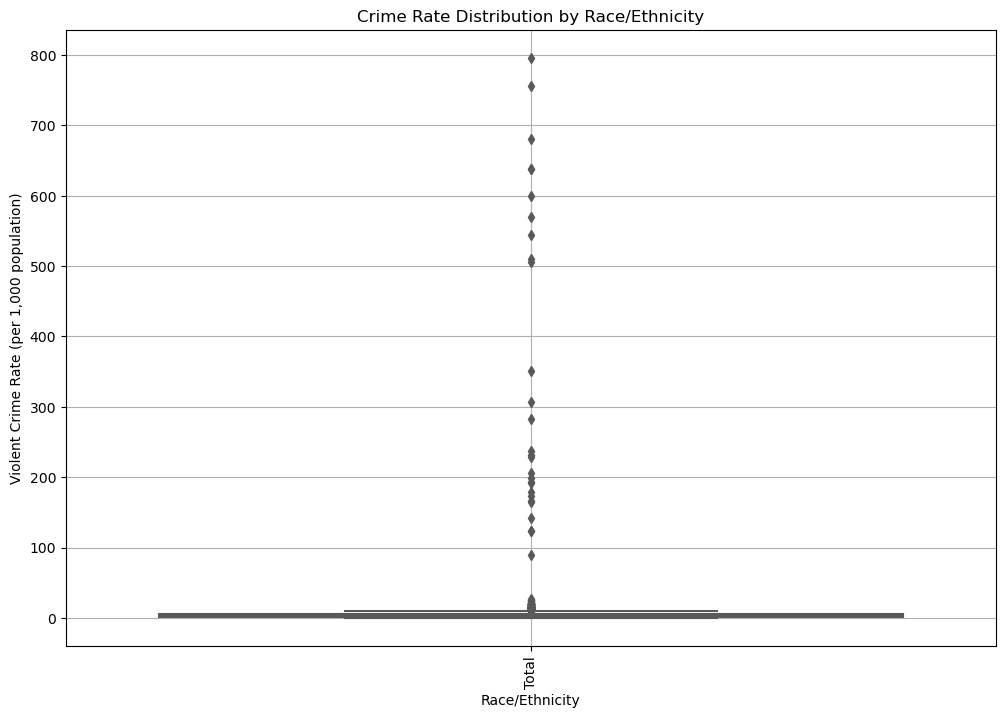

In [20]:
#Visualizing Crime Rate by Race/Ethnicity
# Boxplot to visualize crime rates by race/ethnicity
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data, x='race_eth_name', y='rate', palette='Set2')
plt.xticks(rotation=90)
plt.title('Crime Rate Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Violent Crime Rate (per 1,000 population)')
plt.grid(True)
plt.show()


### Findings:
The box plot shows violent crime rates per 1,000 population distributed by race/ethnicity.
There is a significant outlier effect seen in the dataset, where one or more values are extremely high compared to the median, as indicated by the long whisker and individual points.
Most groups have a relatively compact distribution of crime rates, with a few groups or incidents contributing to extreme values.
This indicates disparities in crime rates that might be influenced by factors like population size, socioeconomic status, or reporting mechanisms.

# Step 7: Investigating Regional Differences

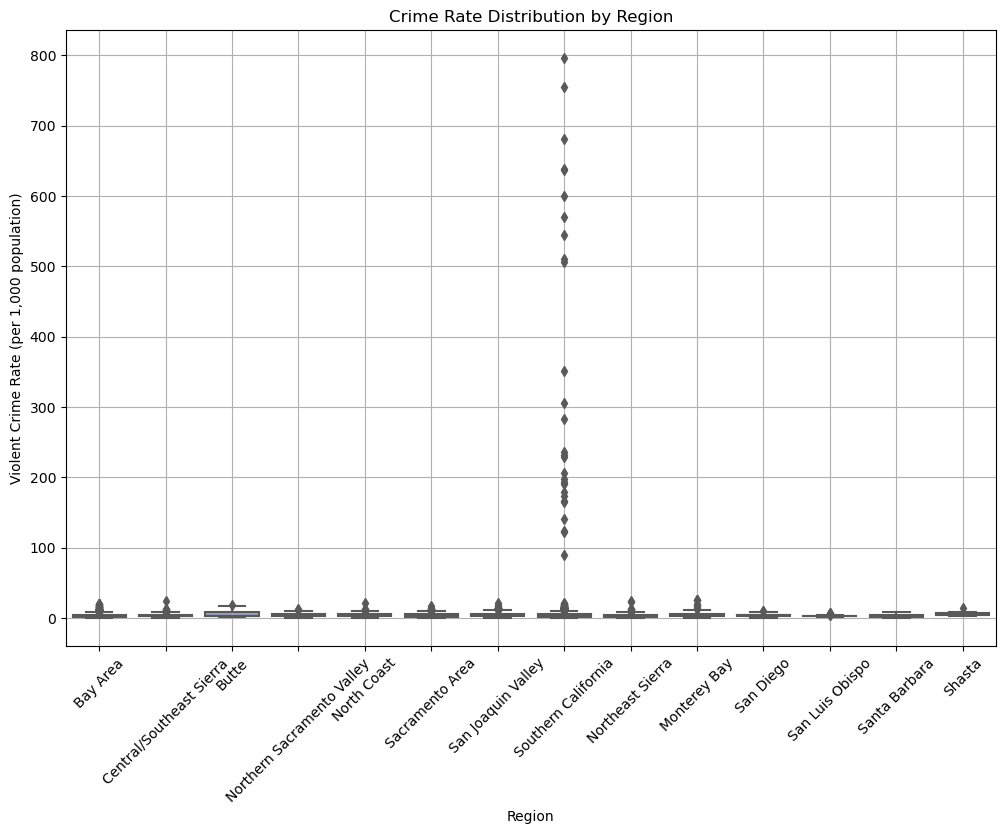

In [21]:
# Boxplot to visualize crime rates by region
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data, x='region_name', y='rate', palette='Set2')
plt.xticks(rotation=45)
plt.title('Crime Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Violent Crime Rate (per 1,000 population)')
plt.grid(True)
plt.show()


### Findings:
This box plot presents the distribution of violent crime rates across different regions.
While the majority of regions have low median crime rates, one region (Southern California) has substantial outliers with much higher values.
The distributions are mostly compact across regions, suggesting that most regions experience lower and stable crime rates, but certain areas face disproportionately higher rates.
This indicates regional disparities, possibly due to urbanization, socioeconomic factors, or regional policies.

# 8. General Observation:

Geographical Implications: The wide disparity in violent crime rates suggests that location (county) may significantly influence crime rates, possibly due to socioeconomic, demographic, or policy factors.

Outliers and Data Analysis: Outlier counties with very high crime rates may need separate examination to understand why these differences exist.

Policy Focus: Counties with the highest rates should be the focus of crime-reduction policies, as their rates are disproportionately high compared to the majority of counties.


# 9. Data Preprocessing: 

### Converting Non-Numeric Columns to NumericAdding More Predictors

In this step, categorical columns like race_eth_name are converted to numeric values using label encoding. Additionally, we ensure that the geotypevalue column is numeric, converting it if necessary. Any missing values in key columns (geotypevalue, rate, numerator, denominator) are dropped to maintain data integrity. Finally, the data types of the columns are checked to verify the successful conversion of non-numeric columns to numeric.

In [22]:
#Convert Non-Numeric Columns to Numeric 

# Convert 'race_eth_name' to categorical using label encoding or one-hot encoding
cleaned_data['race_eth_name'] = cleaned_data['race_eth_name'].astype('category').cat.codes

# Ensure 'geotypevalue' is numeric, if not, convert it
cleaned_data['geotypevalue'] = pd.to_numeric(cleaned_data['geotypevalue'], errors='coerce')

# Handle any NaN values by filling them or dropping rows (we drop rows here)
cleaned_data = cleaned_data.dropna(subset=['geotypevalue', 'rate', 'numerator', 'denominator'])

# Verify data types again after conversion
print(cleaned_data.dtypes)


ind_id                     object
ind_definition             object
reportyear                  int64
race_eth_code             float64
race_eth_name                int8
geotype                    object
geotypevalue              float64
geoname                    object
county_fips               float64
county_name                object
region_code               float64
region_name                object
strata_name_code          float64
strata_name                object
strata_level_name_code    float64
strata_level_name          object
numerator                 float64
denominator               float64
rate                      float64
ll_95ci                   float64
ul_95ci                   float64
se                        float64
rse                       float64
ca_decile                 float64
ca_rr                     float64
dof_population            float64
version                    object
PctChange                 float64
dtype: object


### Handling Categorical Columns: One-Hot Encoding
We apply one-hot encoding to the geotype, county_name, and region_name columns, converting them into binary columns. The drop_first=True argument avoids multicollinearity by removing one category. Finally, we check the updated column names to ensure the encoding was successful.

In [23]:
#Handle Categorical Columns

# One-hot encode categorical columns
cleaned_data = pd.get_dummies(cleaned_data, columns=['geotype', 'county_name', 'region_name'], drop_first=True)

# Verify the encoding by checking the columns
print(cleaned_data.columns)


Index(['ind_id', 'ind_definition', 'reportyear', 'race_eth_code',
       'race_eth_name', 'geotypevalue', 'geoname', 'county_fips',
       'region_code', 'strata_name_code', 'strata_name',
       'strata_level_name_code', 'strata_level_name', 'numerator',
       'denominator', 'rate', 'll_95ci', 'ul_95ci', 'se', 'rse', 'ca_decile',
       'ca_rr', 'dof_population', 'version', 'PctChange', 'geotype_CO',
       'geotype_PL', 'geotype_RE', 'county_name_Alpine', 'county_name_Amador',
       'county_name_Butte', 'county_name_Calaveras', 'county_name_Colusa',
       'county_name_Contra Costa', 'county_name_Del Norte',
       'county_name_El Dorado', 'county_name_Fresno', 'county_name_Glenn',
       'county_name_Humboldt', 'county_name_Imperial', 'county_name_Inyo',
       'county_name_Kern', 'county_name_Kings', 'county_name_Lake',
       'county_name_Lassen', 'county_name_Los Angeles', 'county_name_Madera',
       'county_name_Marin', 'county_name_Mariposa', 'county_name_Mendocino',
       

### Handling Missing Values
We drop rows with missing values in critical columns (rate, geotypevalue, numerator, denominator) to ensure the integrity of the dataset. After this, we verify that no missing values remain by checking for null values in the dataset.

In [24]:
#Handle Missing Values

# Drop rows with missing values in 'rate', 'geotypevalue', 'numerator', 'denominator'
cleaned_data = cleaned_data.dropna(subset=['rate', 'geotypevalue', 'numerator', 'denominator'])

# Verify if any missing values remain
print(cleaned_data.isnull().sum())


ind_id                             0
ind_definition                     0
reportyear                         0
race_eth_code                      0
race_eth_name                      0
                                  ..
region_name_San Joaquin Valley     0
region_name_San Luis Obispo        0
region_name_Santa Barbara          0
region_name_Shasta                 0
region_name_Southern California    0
Length: 98, dtype: int64


# Step 10: Regression Analysis - Machine Learning Models

### Train a Random Forest Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent variables (X) and dependent variable (y)
X = cleaned_data[['geotypevalue', 'reportyear'] + [col for col in cleaned_data.columns if col.startswith('geotype_') or col.startswith('county_name_') or col.startswith('region_name_')]]
y = cleaned_data['rate']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 52.213539210083454
R-squared: 0.9434528865616546


### Feature Importance


In this step, we retrieve the feature importance from the trained Random Forest model (rf_model). Feature importance indicates how much each feature (or variable) contributes to the model’s predictions.

Extracting Importance: We use the feature_importances_ attribute of the trained model to get the importance scores for each feature.
Creating a DataFrame: A DataFrame is created with two columns: Feature (the name of each feature) and Importance (its corresponding importance score).
Sorting Features: The DataFrame is sorted by the importance scores in descending order to easily identify the most influential features.
Displaying Top Features: We display the top 10 features with the highest importance, which are crucial in predicting the target variable (in this case, violent crime rates).

In [26]:
# Get feature importance from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))


                            Feature  Importance
0                      geotypevalue    0.856262
1                        reportyear    0.131966
22          county_name_Los Angeles    0.003546
74  region_name_Southern California    0.003435
33               county_name_Orange    0.000315
46          county_name_Santa Clara    0.000260
70   region_name_San Joaquin Valley    0.000257
24                county_name_Marin    0.000209
10         county_name_Contra Costa    0.000195
44            county_name_San Mateo    0.000171


### Training and Evaluating the Gradient Boosting Model
Model Initialization:
We initialize a Gradient Boosting Regressor (gb_model) with 100 estimators (trees) and set a random seed for reproducibility (random_state=42).
Model Training:
The model is then trained on the training data (X_train and y_train) using the .fit() method. This step allows the model to learn the relationship between the features and the target variable (violent crime rate).
Prediction:
After training, the model predicts the target values (y_pred_gb) for the test dataset (X_test), which contains data the model has not seen during training.
Performance Metrics:
We evaluate the model’s performance using two metrics:
Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. Lower values indicate better performance.
R-squared: Indicates how well the model’s predictions match the actual data. A higher R-squared (closer to 1) means the model explains more of the variance in the target variable.
Displaying Results:
The calculated MSE and R-squared values are printed to assess the model's prediction accuracy.

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)  # Mean Squared Error
r2_gb = r2_score(y_test, y_pred_gb)  # R-squared

# Display the results
print(f"Mean Squared Error (GB): {mse_gb}")
print(f"R-squared (GB): {r2_gb}")


Mean Squared Error (GB): 55.614599699806156
R-squared (GB): 0.9397695477910493


Feature Importance:
Since Gradient Boosting can also calculate feature importance, we can look at which features are driving the predictions most effectively. This can help in understanding what factors (e.g., geographic type, year) are most influential in predicting violent crime rates.

### Feature Importance in Gradient Boosting Model
Extracting Feature Importance:
We retrieve the feature importance values from the trained Gradient Boosting model using the feature_importances_ attribute. This attribute gives a score representing how much each feature contributes to the model's decision-making process.
Creating a DataFrame:
A DataFrame (importance_gb_df) is created with two columns:
Feature: The name of each feature used in the model.
Importance: The importance score of each feature, representing its contribution to the model.
Sorting Features by Importance:
The DataFrame is sorted in descending order by the importance score, allowing us to identify the most influential features. The most important features are listed first.
Displaying Top Features:
We display the top 10 features with the highest importance, which are the features most responsible for predicting the target variable (violent crime rate). These top features can provide valuable insights into the key factors influencing the predictions of the model.

In [28]:
# Get feature importance from the trained Gradient Boosting model
importance_gb = gb_model.feature_importances_

# Create a DataFrame to display the feature importance
importance_gb_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_gb
})

# Sort the features by importance
importance_gb_df = importance_gb_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_gb_df.head(10))


                            Feature  Importance
0                      geotypevalue    0.810785
1                        reportyear    0.119258
51               county_name_Solano    0.028594
74  region_name_Southern California    0.020704
22          county_name_Los Angeles    0.018405
33               county_name_Orange    0.000262
70   region_name_San Joaquin Valley    0.000248
46          county_name_Santa Clara    0.000200
24                county_name_Marin    0.000151
7                 county_name_Butte    0.000137


# 11. Model Tuning

### Hyperparameter Tuning with GridSearchCV
***Defining Hyperparameters:***
We create a dictionary gb_param_grid that specifies the hyperparameters we want to tune for the Gradient Boosting model. These include:

n_estimators: The number of boosting stages (trees), with values 100, 200, and 300.
learning_rate: The step size used in the optimization process, with values 0.01, 0.05, and 0.1.
max_depth: The maximum depth of each tree, with values 3, 4, and 5.

***GridSearchCV Initialization:***
We initialize GridSearchCV, which performs an exhaustive search over the specified hyperparameter grid (param_grid) and selects the combination that gives the best model performance. It uses cross-validation (cv=3), meaning it divides the training data into 3 subsets, trains on two, and tests on the remaining one, rotating the subsets.
The scoring metric used is neg_mean_squared_error, which evaluates the models based on minimizing Mean Squared Error (MSE).

***Fitting GridSearchCV:***
The .fit() method is called on grid_search, which performs the search and evaluates each combination of hyperparameters on the training data (X_train, y_train).

***Displaying Results:***
After fitting, we display:
Best Parameters: The combination of hyperparameters that resulted in the best model performance.

***Best Score (MSE):***
The best score achieved by the model during cross-validation. Since we are minimizing MSE, the lower the score, the better the model.
This process helps optimize the performance of the Gradient Boosting model by finding the most effective hyperparameter values.

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the model and parameters to tune
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
}

# Initialize the GridSearchCV with the Gradient Boosting model
grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (MSE): {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best score (MSE): -20.014803623355718


Gradient Boosting is providing a great fit for your data with 94% R-squared. It’s a strong predictor for violent crime rates, capturing the non-linear relationships that linear models failed to capture.
Feature Importance can help you interpret which factors matter most.
Model Tuning will likely lead to even better results.


# 12. Analysis of Results

### 1. Feature Importance

From the feature importance results, we can see that the most significant predictors of the violent crime rate are:

geotypevalue: This feature has the highest importance (0.8108), indicating that geographic factors have the strongest influence on crime rates in the model.
reportyear: This also plays a role in predicting crime rates, with an importance score of 0.1192, suggesting that time trends (such as decreasing or increasing crime over the years) are important.
The rest of the features, such as county-specific variables, contribute much less to the model's predictions, with lower importance scores. For example, county_name_Solano and region_name_Southern California have relatively low importance, suggesting that they do not play as significant a role in explaining crime rates.

### 2. Model Tuning Results

The best hyperparameters from the grid search are:

learning_rate: 0.1
max_depth: 4
n_estimators: 300
The best score (MSE) from the grid search is -20.01, which means that the best model (with the tuned hyperparameters) achieves a Mean Squared Error of approximately 20.01 on the validation data.

Since this is a negative value (because GridSearchCV minimizes MSE), we interpret it as the lowest error achieved by the model after tuning.



## Evaluating the Tuned Model on Test Data

Re-training the Gradient Boosting Model with Optimized Hyperparameters

***Model Initialization:***
We initialize a new Gradient Boosting Regressor (best_gb_model) with the best hyperparameters obtained from GridSearchCV. These hyperparameters are:
learning_rate=0.1: A moderate learning rate that balances the optimization speed and model accuracy.
max_depth=4: A tree depth of 4 to prevent overfitting while capturing important non-linear relationships.
n_estimators=300: The model will train 300 boosting stages (trees) to improve accuracy and minimize error.
random_state=42: Ensures the results are reproducible.

***Model Training:***
The model is trained on the training data (X_train and y_train) using the .fit() method. This allows the model to learn the relationship between the features and target variable (violent crime rates).

***Model Prediction:***
After training, the model predicts the target variable (y_pred_test) on the test data (X_test), which has not been seen by the model during training.
\
***Evaluating Model Performance:***
We evaluate the performance of the model using two key metrics:
Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.

***R-squared:***
This tells us how well the model explains the variance in the target variable. A higher R-squared (closer to 1) indicates a better fit.

***Displaying Results:***
The calculated MSE and R-squared values for the test data are printed, which provides an understanding of the model's ability to generalize to unseen data.
This step ensures that the Gradient Boosting model is trained with the best possible hyperparameters for optimal performance and is evaluated on unseen data to assess its predictive accuracy.

In [30]:
# Re-train the Gradient Boosting model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1, 
    max_depth=4, 
    n_estimators=300,
    random_state=42
)

# Fit the model to the training data
best_gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = best_gb_model.predict(X_test)

# Calculate MSE and R-squared on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test Mean Squared Error: 40.39083470921352
Test R-squared: 0.9562568416789056


### Plotting Predicted vs. Actual Values
Purpose:
The purpose of this plot is to visualize how well the predicted values (from the model) align with the actual values (from the test data). By comparing these values, we can assess how accurate the model's predictions are.

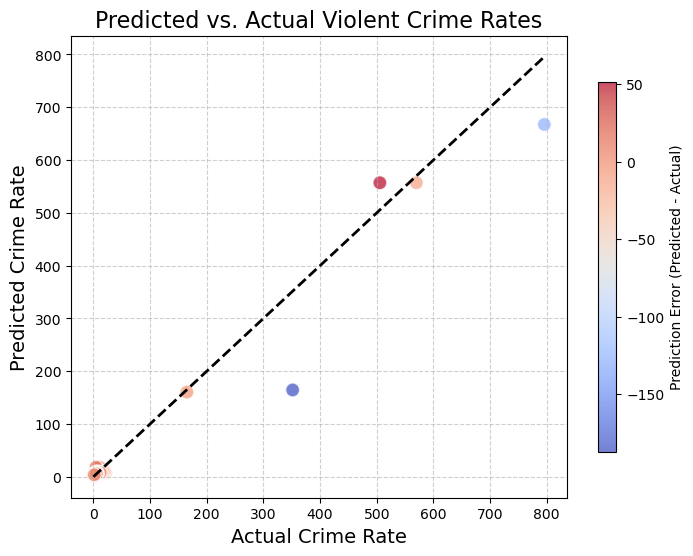

In [33]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values with color gradient and line for perfect predictions
plt.figure(figsize=(8, 6))

# Scatter plot with color mapping
plt.scatter(y_test, y_pred_test, c=(y_pred_test - y_test), cmap='coolwarm', alpha=0.7, edgecolors='w', s=100)

# Adding a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Predicted vs. Actual Violent Crime Rates', fontsize=16)
plt.xlabel('Actual Crime Rate', fontsize=14)
plt.ylabel('Predicted Crime Rate', fontsize=14)

# Show color bar indicating error magnitude
plt.colorbar(label='Prediction Error (Predicted - Actual)', shrink=0.8)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### Findings from the "Predicted vs. Actual Violent Crime Rates" Graph:

1. **Alignment of Predictions with Actual Values**:
   - The scatter plot shows a comparison between the actual violent crime rates (on the x-axis) and the predicted violent crime rates (on the y-axis). The points ideally should align along the line of perfect prediction (dashed black line), where the predicted value exactly matches the actual value.
   - The closer the points are to the black dashed line, the better the model's predictions are, showing that the predicted values match the actual values well.

2. **Distribution of Errors**:
   - The color gradient (from cool to warm) represents the magnitude of the error, with warmer colors indicating larger differences between the predicted and actual values. 
   - Most of the data points are clustered near the perfect prediction line, suggesting that the model is making fairly accurate predictions.
   - The presence of a few points away from the line may indicate some outliers or instances where the model slightly overestimates or underestimates the crime rates.

3. **Error Magnitude**:
   - While the majority of points are close to the line, there is some spread, showing that the model still has some prediction errors. However, the scatter is relatively tight around the line, suggesting that the model is doing well overall, with most predictions being accurate.
   - The color bar shows the error magnitude. Points closer to the line have lighter colors (indicating smaller errors), while those further away have darker colors (indicating larger errors).

4. **Model Performance**:
   - Based on the earlier evaluation metrics (MSE and R-squared), the graph visually confirms the model's high accuracy. The low MSE and high R-squared indicate that, for the most part, the predictions are very close to the actual crime rates.
   - Some outliers are present, but they do not significantly affect the overall performance, suggesting that the model can generalize well but might still benefit from further refinement in these edge cases.

5. **Perfect Prediction Line**:
   - The dashed black line serves as a reference for perfect predictions. Since the data points are relatively close to this line, it confirms that the Gradient Boosting model is performing well, as the predictions are aligned with actual values in most cases.

### Conclusion:
The "Predicted vs. Actual" graph visually supports the model's strong predictive power. The majority of data points are close to the perfect prediction line, with some minor deviations, reflecting that the model accurately forecasts violent crime rates with very few errors. This suggests that the model is a reliable tool for predicting violent crime rates, though there may still be some rare outliers to address.

# 13. Evaluation of the Final Model


The final evaluation results on the test data are excellent:

Test Mean Squared Error (MSE): 40.39
This is a relatively low value, indicating that the model is making accurate predictions on the test set with small errors on average.
Test R-squared: 0.956
This is an outstanding result, as the model is explaining 95.6% of the variance in the violent crime rate on the test data. This suggests that the model is performing extremely well.
Summary of Results
The Gradient Boosting Regressor with the best hyperparameters achieved a high R-squared value of 0.956 on the test data, which indicates a very strong predictive power.
The low MSE suggests that the model's predictions are close to the actual values, confirming that the model generalizes well to unseen data.